In [4]:
import pandas
import numpy as np
X_train=pandas.read_csv('G:/Acads/ML for data science/HW2/X_train.csv',header=None,index_col=False)
X_test=pandas.read_csv('G:/Acads/ML for data science/HW2/X_test.csv',header=None,index_col=False)
y_train=pandas.read_csv('G:/Acads/ML for data science/HW2/y_train.csv',header=None,index_col=False)
y_test=pandas.read_csv('G:/Acads/ML for data science/HW2/y_test.csv',header=None,index_col=False)

In [9]:
#KNN
l=20
y_pred_knn=np.zeros(shape=(len(y_test)))
dist_index_mat=np.zeros(shape=(len(y_test),l))
for i in range(len(y_test)):#
    distances=np.zeros(shape=len(y_train))
    for j in range(len(y_train)):#len(y_train)
        distances[j]=np.absolute(np.add(X_train[j:j+1],-X_test[i:i+1])).sum(axis=1).tolist()[0]
    dist_index_mat[i]=distances.argsort()[0:20]
k=range(20)
y_pred_knn=np.zeros(shape=(len(X_test),len(k)))
accuracy=np.zeros(shape=len(k))

for i in k:
    sum=0
    for j in range(len(X_test)):#
        if float((y_train[0][dist_index_mat[j][0:i+1]]).sum(axis=0))>=(2+i)/2:
            y_pred_knn[j][i]=1
        if y_test[0][j]==y_pred_knn[j][i]:
            sum=sum+1
    accuracy[i]=float(sum)/len(X_test)
accuracy   
#dist_index_mat
##Final results:
# 0.88172043,  0.83870968,  0.87096774,  0.87096774,  0.90322581,
#        0.89247312,  0.89247312,  0.88172043,  0.88172043,  0.86021505,
#        0.86021505,  0.87096774,  0.87096774,  0.86021505,  0.87096774,
#        0.87096774,  0.87096774,  0.87096774,  0.87096774,  0.87096774]

array([ 0.88172043,  0.83870968,  0.87096774,  0.87096774,  0.90322581,
        0.89247312,  0.89247312,  0.88172043,  0.88172043,  0.86021505,
        0.86021505,  0.87096774,  0.87096774,  0.86021505,  0.87096774,
        0.87096774,  0.87096774,  0.87096774,  0.87096774,  0.87096774])

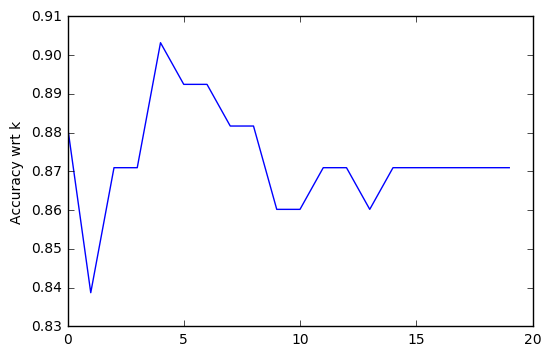

In [10]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.ylabel('Accuracy wrt k')
plt.show()


In [11]:
#Logistic Regression
import pandas
import numpy as np
import copy
from scipy import special
X_train=pandas.read_csv('G:/Acads/ML for data science/HW2/X_train.csv',header=None,index_col=False)
X_test=pandas.read_csv('G:/Acads/ML for data science/HW2/X_test.csv',header=None,index_col=False)
y_train=pandas.read_csv('G:/Acads/ML for data science/HW2/y_train.csv',header=None,index_col=False)
y_test=pandas.read_csv('G:/Acads/ML for data science/HW2/y_test.csv',header=None,index_col=False)
X_train_log=X_train.copy()
X_train_log['X0']=np.ones(shape=len(X_train))
X_test_log=X_test.copy()
X_test_log['X0']=np.ones(shape=len(X_test))
y_train_log=y_train.copy()
y_test_log=y_test.copy()
for i in range(len(y_train)):
    if y_train[0][i]==0:
        y_train_log[0][i]=-1
for i in range(len(y_test)):
    if y_test[0][i]==0:
        y_test_log[0][i]=-1

def sigmoid(input):
    out=special.expit(input)
    for i in range(len(out)):
        if out[i]==0:
            out[i]=0.0000000000000000001
        elif out[i]==1:
            out[i]=0.9999999999999999999
    return out

In [12]:
#Logistic steepest ascent method
k=10000
X_train_f=X_train_log.as_matrix()
l_curr=np.zeros(shape=len(X_train_log))
L=np.zeros(shape=k)
y_x=(y_train_log[0].as_matrix()*X_train_f.transpose()).transpose()
w=np.zeros(shape=len(X_train_f[0]))
for i in range(k):
    multi=1/((10**5)*((i+2)**0.5))
    x=sigmoid((y_train_log[0].as_matrix())*np.dot(w,X_train_f.transpose()))
    deriv=np.dot(1-x,y_x)
    L[i]=np.log(x).sum()
    w=w+multi*deriv

y_pred_steep=np.ones(shape=len(X_test_log))
for i in range(len(X_test_log)):
    if (np.dot(w,X_test_log[i:i+1].as_matrix()[0]))<0:
        y_pred_steep[i]=-1
sum=0        
for i in range(len(X_test_log)):
    
    if y_pred_steep[i]==y_test_log[0][i]:
        sum=sum+1
accuracy_log_steep=float(sum)/len(X_test_log)
accuracy_log_steep
#Accuracy=.827

0.8279569892473119

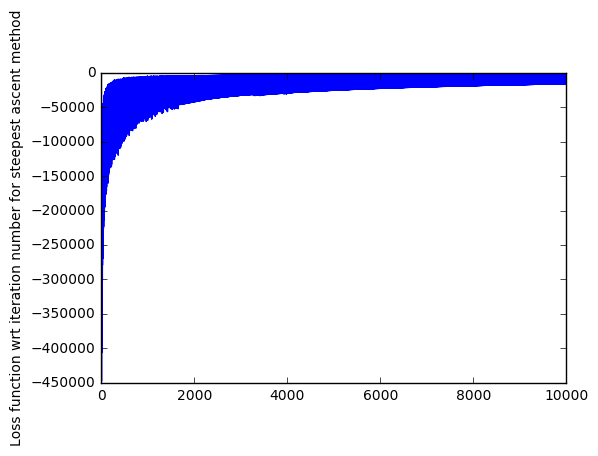

In [14]:
#import matplotlib.pyplot as plt
plt.plot(L)
plt.ylabel('Loss function wrt iteration number for steepest ascent method')
plt.show()


In [15]:
#Newton Raphson Matrix form Working
k=100
X_train_f=X_train_log.as_matrix()
L=np.zeros(shape=k)
y_x=(y_train_log[0].as_matrix()*X_train_f.transpose()).transpose()
w=0*np.ones(shape=len(X_train_f[0]))
y= X_train_f[...,None]*X_train_f[:,None,:]
for i in range(k):
    multi=1/(((i+2)**0.5))
    x=sigmoid((y_train_log[0].as_matrix())*np.dot(w,X_train_f.transpose()))
    x1=sigmoid(np.dot(w,X_train_f.transpose()))
    scalar=x1*(1-x1)
    deriv=np.dot(1-x,y_x)
    deriv_2=-1*(scalar*y.transpose()).transpose().sum(axis=0)
    L[i]=(np.log(x)).sum()
    w=w-multi*np.dot(np.linalg.inv(deriv_2),deriv)
print L

#Prediction
y_pred_newt=np.ones(shape=len(X_test_log))
for i in range(len(X_test_log)):
    if (np.dot(w,X_test_log[i:i+1].as_matrix()[0]))<0:
        y_pred_newt[i]=-1
sum=0        
for i in range(len(X_test_log)):
    
    if y_pred_newt[i]==y_test_log[0][i]:
        sum=sum+1
accuracy_log_newt=float(sum)/len(X_test_log)
accuracy_log_newt
#Accuracy=0.9139784946236559

[-3124.70748996 -1615.41926299 -1230.79614595 -1042.37306585  -935.53592803
  -870.51550789  -829.18697517  -802.1895402   -784.3606701   -772.63368372
  -764.96998133  -759.97135599  -756.70999042  -754.58256392  -753.19701007
  -752.29797596  -751.71852461  -751.34824027  -751.11344973  -750.96533092
  -750.87209564  -750.8134006   -750.77637939  -750.75294984  -750.7380537
  -750.72853014  -750.72240326  -750.71843519  -750.71584749  -750.71414822
  -750.71302464  -750.71227667  -750.71177545  -750.71143742  -750.71120803
  -750.71105145  -750.71094393  -750.7108697   -750.71081818  -750.71078223
  -750.71075703  -750.71073927  -750.7107267   -750.71071777  -750.71071139
  -750.71070682  -750.71070352  -750.71070115  -750.71069942  -750.71069816
  -750.71069725  -750.71069657  -750.71069608  -750.71069571  -750.71069544
  -750.71069524  -750.71069509  -750.71069498  -750.7106949   -750.71069484
  -750.71069479  -750.71069475  -750.71069473  -750.71069471  -750.71069469
  -750.710694

0.9139784946236559

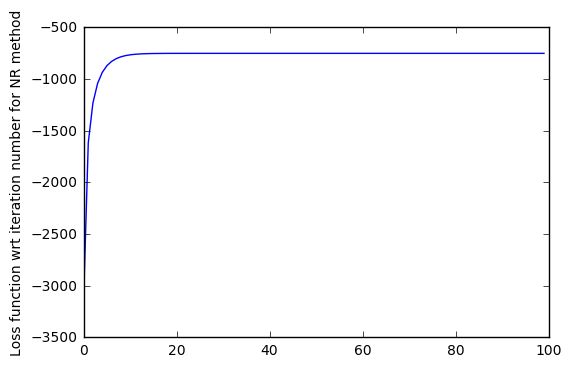

In [16]:
plt.plot(L)
plt.ylabel('Loss function wrt iteration number for NR method')
plt.show()
